In [15]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

##### What's the differences between `to_datetime()` vs `DatetimeIndex()`?


In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_posted_month"] = df["job_posted_date"].dt.strftime("%B")  # Took too long to run
df["month_number"] = df["job_posted_date"].dt.month
df.iloc[:, -2:]

,job_posted_month,month_number
0,June,6
1,January,1
2,October,10
3,July,7
4,August,8
...,...,...
785736,March,3
785737,March,3
785738,March,3
785739,March,3


In [4]:
df_US = df.loc[df["job_country"] == "United States"]
top_3_US = df_US["job_title_short"].value_counts().head(3).index
df_US_pivot = df_US.pivot_table(
    index=["month_number", "job_posted_month"],
    columns="job_title_short",
    aggfunc="size",
)

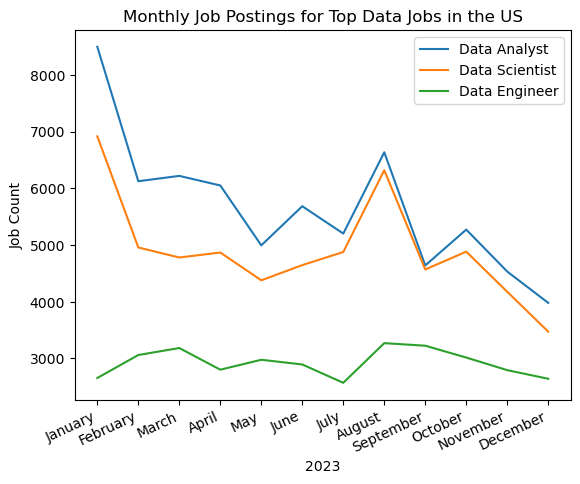

In [14]:
# Plotting using pivot table with MultiIndex
df_US_pivot[top_3_US].plot(
    kind="line",
    title="Monthly Job Postings for Top Data Jobs in the US",
    xlabel="2023",
    ylabel="Job Count",
)
plt.xticks(
    range(0, len(df_US_pivot.index.get_level_values(1))),
    df_US_pivot.index.get_level_values(1),
    rotation=25,
    ha="right",
)
plt.legend()
plt.show()

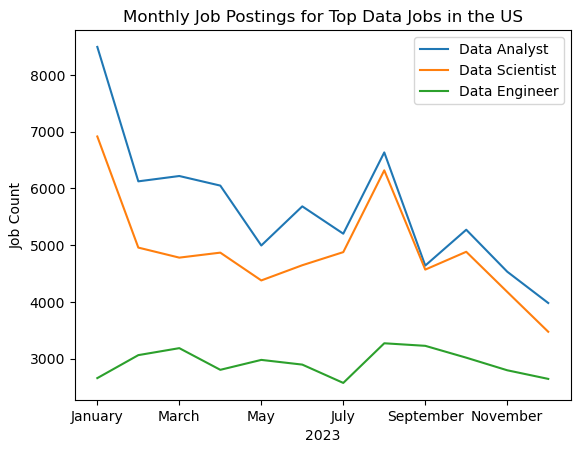

In [6]:
# Plotting by resetting MultiIndex from pivot table
df_US_pivot_reset_index = df_US_pivot.reset_index(level=0, drop=True)
df_US_pivot_reset_index[top_3_US].plot(
    kind="line",
    xlabel="2023",
    ylabel="Job Count",
    title="Monthly Job Postings for Top Data Jobs in the US",
)
plt.legend()
plt.show()

In [13]:
# Plotting using pivot table with 1 index
df_US_pivot_1 = df_US.pivot_table(
    index="job_posted_month", columns="job_title_short", aggfunc="size"
)
df_US_pivot_1.reset_index(inplace=True)
df_US_pivot_1["month_number"] = pd.to_datetime(  # convert to datetime format
    df_US_pivot_1["job_posted_month"], format="%B"
).dt.month
df_US_pivot_1.sort_values("month_number", inplace=True)
df_US_pivot_1.set_index("job_posted_month", inplace=True)
df_US_pivot_1.drop(columns="month_number", inplace=True)

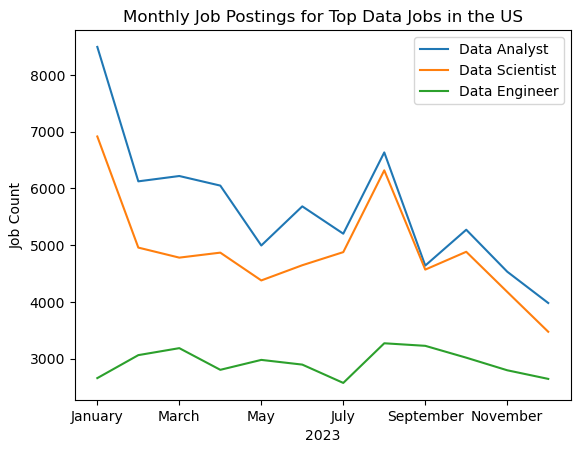

In [8]:
df_US_pivot_1[top_3_US].plot(
    kind="line",
    xlabel="2023",
    ylabel="Job Count",
    title="Monthly Job Postings for Top Data Jobs in the US",
)
plt.legend()
plt.show()